# Data Exploration (SPE11C 3D CCS Model)

Objectives:
- Load raw spatial & time-series data.  
- Inspect shapes, ranges, and missing values.  
- Visualize pressure, saturation, density distributions.  
- Check whether the grid follows a structured layout.  
- Identify potential preprocessing requirements.  

**Source:** Society of Petroleum Engineers (SPE)  
**Dataset:** SPE Comparative Solution Project - Model 11C (3D CO₂ Injection)  

## 1. Dataset Overview

### 1.1 Spatial Data

The spatial dataset contains N rows (grid samples) and 11 features (physical reservoir properties). Each row represents a grid cell in the reservoir model at a specific spatial location.

**Feature Descriptions**

Coordinate System:
- **x [m]** - Horizontal coordinate in meters, representing the position along the reservoir’s X-axis.
- **y [m]** - Horizontal coordinate in meters, representing the position along the reservoir’s Y-axis.
- **z [m]** - Vertical depth of the grid cell in meters. Higher values indicate deeper locations in the reservoir.

Fluid & Rock Properties:
- **pressure [Pa]** - Reservoir pore pressure at each grid cell measured in Pascals.
- **saturation [-]** - Gas saturation fraction (dimensionless), indicating the proportion of pore volume occupied by gas.
- **mCO2 [-]** - Mass fraction of CO₂ in the gas/liquid mixture (dimensionless).
- **mH2O [-]** - Mass fraction of water in the gas/liquid mixture (dimensionless).

Phase Densities:
- **rhoG [kg/m3]** - Gas-phase density (kg/m³).
- **rhoL [kg/m3]** - Liquid-phase density (kg/m³).

Mass & Temperature:
- **tmCO2 [kg]** - Total mass of CO₂ in the grid cell (kg).
- **temp [°C]** - Temperature at the grid cell measured in degrees Celsius.

Simulation Metadata:
- **year** - Simulation time step (0-10 years)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

RAW = Path(r"C:\Users\tetec\Documents\Data Project Coding\.vscode\Project data\spe11c\data\raw")

In [2]:
dtype_map = {
    "x [m]": "float32",
    "y [m]": "float32",
    "z [m]": "float32",
    "pressure [Pa]": "float32",
    "saturartion [-]": "float32",
    "mCO2 [-]": "float32",
    "mH20 [-]": "float32",
    "rhoG [kg/m3]": "float32",
    "rhoL [kg/m3]": "float32",
    "tmCO2 [kg]": "float32",
    "temp [°C]": "float32",
}

In [3]:
spatial_files = sorted(RAW.glob("spe11c_spatial_map_*.csv"))

In [4]:
# Load Spatial Data
dfs = []

for f in spatial_files:
    year = int(f.stem.split("_")[-1].replace("y", ""))
    
    df = pd.read_csv(f, dtype=dtype_map)
    df["year"] = year
    dfs.append(df)

spatial_all = pd.concat(dfs, ignore_index=True)

In [5]:
# clean column names 
spatial_all.columns = (
    spatial_all.columns
    .str.strip()
    .str.lstrip('#')
)

spatial_all.head()

,x [m],y [m],z [m],pressure [Pa],saturation [-],mCO2 [-],mH2O [-],rhoG [kg/m3],rhoL [kg/m3],tmCO2 [kg],temp [°C],year
0,25.0,25.0,5.0,29350000.0,0.0,0.000001,0.0,795.3,992.4,1.763,66.94,0
1,75.0,25.0,5.0,29180000.0,0.0,0.000001,0.0,794.5,992.4,1.763,66.80,0
2,125.0,25.0,5.0,29180000.0,0.0,0.000001,0.0,794.5,992.4,1.763,66.80,0
3,175.0,25.0,5.0,29010000.0,0.0,0.000001,0.0,793.6,992.4,1.763,66.66,0
4,225.0,25.0,5.0,28900000.0,0.0,0.000001,0.0,793.0,992.4,1.763,66.57,0


### 1.2 Time-Series Data

The time-series dataset captures how pressure, mass flow, and CO₂ partitioning evolve over time during the simulation.
It contains N rows (time steps) and 14 features. Each row represents one simulation timestamp.

**Feature Descriptions**

Time:
- **t [s]** - Simulation time in seconds.

Pressure Measurements:
- **p1 [Pa]** - Pressure at monitoring point 1 (Pascals).
- **p2 [Pa]** - Pressure at monitoring point 2 (Pascals).

Phase-Partitioned CO₂ Mass (Region A):
- **mobA [kg]** - Mobile CO₂ mass in region A.
- **immA [kg]** - Immobile (trapped) CO₂ mass in region A.
- **dissA [kg]** - Dissolved CO₂ mass in region A.
- **sealA [kg]** - CO₂ mass accumulated in region A’s sealing unit.

Phase-Partitioned CO₂ Mass (Region B):
- **mobB [kg]** - Mobile CO₂ mass in region B.
- **immB [kg]** - Immobile (trapped) CO₂ mass in region B.
- **dissB [kg]** - Dissolved CO₂ mass in region B.
- **sealB [kg]** - CO₂ mass accumulated in region B’s sealing unit.

Transport & Storage Indicators:
- **mC [m^2]** - Effective migration indicator (e.g., mobility or conductivity metric; unit is square meters).
- **sealTot [kg]** - Total CO₂ mass stored in all seals.
- **boundary [kg]** - CO₂ mass crossing the simulation boundary.

In [ ]:
# Load Time-Series Data
timeseries_file = RAW / "spe11c_time_series.csv"
timeseries = pd.read_csv(timeseries_file)

In [7]:
# clean column names 
timeseries.columns = (
    timeseries.columns
    .str.strip()
    .str.lstrip('#')
)

timeseries.head()

,t [s],p1 [Pa],p2 [Pa],mobA [kg],immA [kg],dissA [kg],sealA [kg],mobB [kg],immB [kg],dissB [kg],sealB [kg],mC [m^2],sealTot [kg],boundary [kg]
0,0.0,26600000.0,20840000.0,0.0,0.0,86930000.0,211200.0,0.0,0.0,56580000.0,275000.0,2.934,1262000.0,257800000.0
1,3153600.0,26600000.0,20840000.0,0.0,0.0,86930000.0,211200.0,0.0,0.0,56580000.0,275000.0,2.937,1262000.0,257800000.0
2,6307200.0,26600000.0,20840000.0,0.0,0.0,86930000.0,211200.0,0.0,0.0,56580000.0,275000.0,2.940,1262000.0,257800000.0
3,9460800.0,26610000.0,20840000.0,0.0,0.0,86930000.0,211200.0,0.0,0.0,56580000.0,275000.0,2.943,1262000.0,257800000.0
4,12614000.0,26610000.0,20840000.0,0.0,0.0,86930000.0,211200.0,0.0,0.0,56580000.0,275000.0,2.946,1262000.0,257800000.0


### 3. Basic Data Profiling

In [8]:
# Overview for Spatial Maps
print("Spatial columns:", spatial_all.columns.tolist())
spatial_all.info()
spatial_all.describe(include="all")

Spatial columns: [' x [m]', 'y [m]', 'z [m]', 'pressure [Pa]', 'saturation [-]', 'mCO2 [-]', 'mH2O [-]', 'rhoG [kg/m3]', 'rhoL [kg/m3]', 'tmCO2 [kg]', 'temp [°C]', 'year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416000 entries, 0 to 52415999
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0    x [m]          float64
 1   y [m]           float64
 2   z [m]           float64
 3   pressure [Pa]   float64
 4   saturation [-]  float64
 5   mCO2 [-]        float64
 6   mH2O [-]        float64
 7   rhoG [kg/m3]    float64
 8   rhoL [kg/m3]    float64
 9   tmCO2 [kg]      float64
 10  temp [°C]       float64
 11  year            int64  
dtypes: float64(11), int64(1)
memory usage: 4.7 GB


,x [m],y [m],z [m],pressure [Pa],saturation [-],mCO2 [-],mH2O [-],rhoG [kg/m3],rhoL [kg/m3],tmCO2 [kg],temp [°C],year
count,5.241600e+07,5.241600e+07,5.241600e+07,5.241600e+07,5.241600e+07,5.241600e+07,52416000.0,5.241600e+07,5.241600e+07,5.241600e+07,5.241600e+07,5.241600e+07
mean,4.200000e+03,2.500000e+03,6.000000e+02,2.667497e+07,6.680554e-03,2.139390e-03,0.0,8.367718e+02,9.990135e+02,6.200985e+04,5.249139e+01,2.711538e+02
std,2.424828e+03,1.443304e+03,3.463981e+02,3.149349e+06,6.786045e-02,9.520192e-03,0.0,1.347331e+01,3.218931e+00,5.032525e+05,7.544462e+00,3.015100e+02
min,2.500000e+01,2.500000e+01,5.000000e+00,1.056000e+07,0.000000e+00,1.000000e-06,0.0,5.048000e+02,9.924000e+02,1.763000e+00,4.877000e+00,0.000000e+00
25%,2.112500e+03,1.262500e+03,3.025000e+02,2.396000e+07,0.000000e+00,1.000000e-06,0.0,8.313000e+02,9.969000e+02,3.557000e+00,4.514000e+01,3.000000e+01
50%,4.200000e+03,2.500000e+03,6.000000e+02,2.693000e+07,0.000000e+00,1.000000e-06,0.0,8.391000e+02,9.991000e+02,7.112000e+00,5.255000e+01,1.250000e+02
75%,6.287500e+03,3.737500e+03,8.975000e+02,2.922000e+07,0.000000e+00,1.000000e-06,0.0,8.455000e+02,1.001000e+03,8.862000e+00,5.933000e+01,4.500000e+02
max,8.375000e+03,4.975000e+03,1.195000e+03,3.491000e+07,8.901000e-01,8.006000e-02,0.0,1.024000e+03,1.028000e+03,9.518000e+06,6.983000e+01,1.000000e+03


### 4. Missing Value Check

In [9]:
spatial_missing = spatial_all.isna().mean().sort_values(ascending=False)
timeseries_missing = timeseries.isna().mean().sort_values(ascending=False)

spatial_missing.head(10), timeseries_missing.head(10)

( x [m]            0.0
 y [m]             0.0
 z [m]             0.0
 pressure [Pa]     0.0
 saturation [-]    0.0
 mCO2 [-]          0.0
 mH2O [-]          0.0
 rhoG [kg/m3]      0.0
 rhoL [kg/m3]      0.0
 tmCO2 [kg]        0.0
 dtype: float64,
  t [s]        0.0
 p1 [Pa]       0.0
 p2 [Pa]       0.0
 mobA [kg]     0.0
 immA [kg]     0.0
 dissA [kg]    0.0
 sealA [kg]    0.0
 mobB [kg]     0.0
 immB [kg]     0.0
 dissB [kg]    0.0
 dtype: float64)

### 5. Visual Exploration

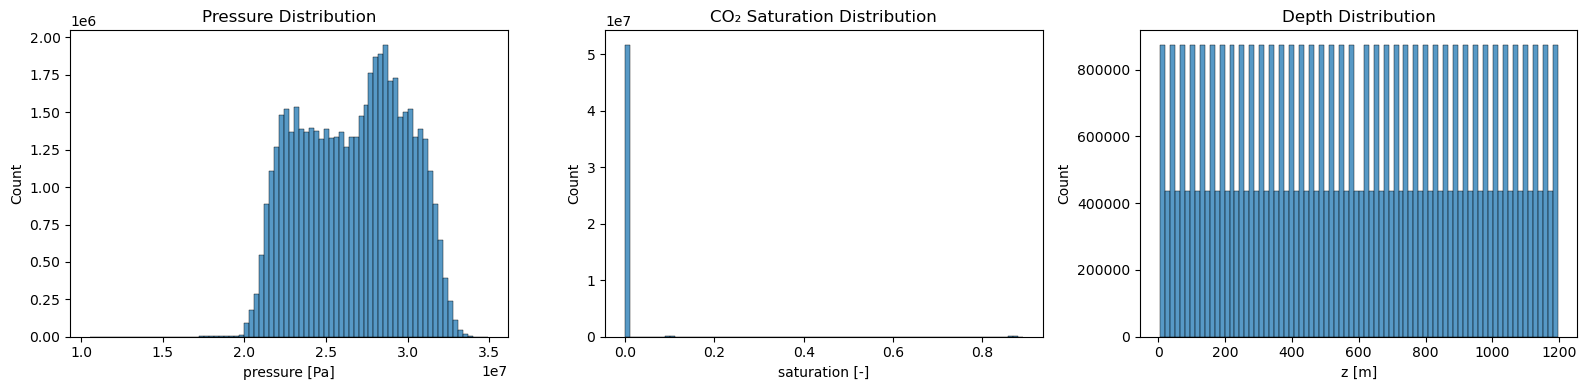

In [11]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.histplot(spatial_all["pressure [Pa]"], bins=80)
plt.title("Pressure Distribution")

plt.subplot(1,3,2)
sns.histplot(spatial_all["saturation [-]"], bins=80)
plt.title("CO₂ Saturation Distribution")

plt.subplot(1,3,3)
sns.histplot(spatial_all["z [m]"], bins=80)
plt.title("Depth Distribution")

plt.tight_layout()
plt.show()

The pressure distribution shows that most grid cells fall within 2.4–3.2×10⁷ Pa, with two distinct clusters around 2.3–2.5×10⁷ Pa and 2.8–3.0×10⁷ Pa, indicating heterogeneous flow behavior and localized pressure zones near the injection region. The CO₂ saturation distribution is dominated by cells with zero saturation, with only small fractions showing low (0.01–0.1) and high (0.8–1.0) saturation, reflecting limited plume spread and concentrated accumulation near the injection point, while the depth histogram confirms a uniformly discretized vertical grid spanning 0–1200 m.

## 6. Inspect Spatial Slices by Year


c:\Users\tetec\anaconda3\envs\Python_project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


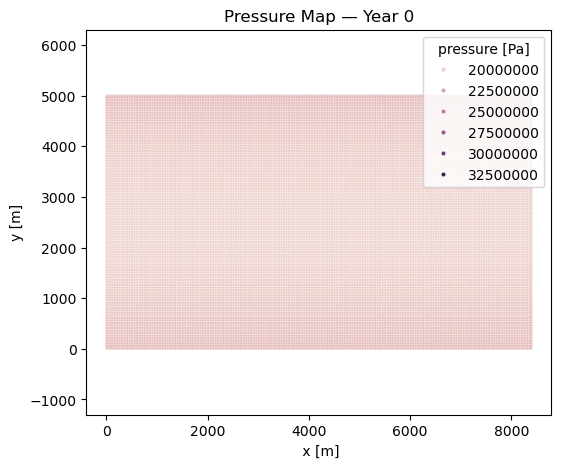

c:\Users\tetec\anaconda3\envs\Python_project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


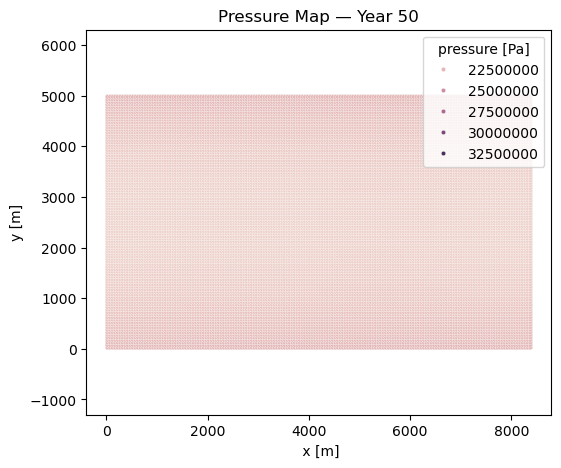

c:\Users\tetec\anaconda3\envs\Python_project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


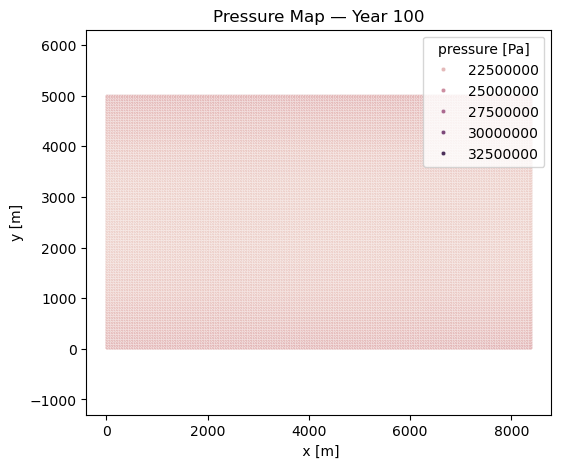

c:\Users\tetec\anaconda3\envs\Python_project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


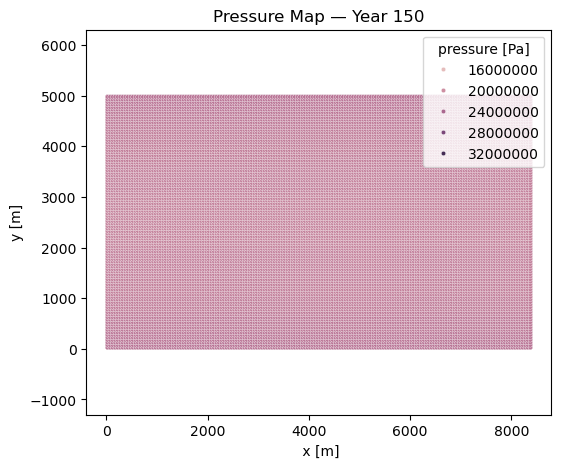

c:\Users\tetec\anaconda3\envs\Python_project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


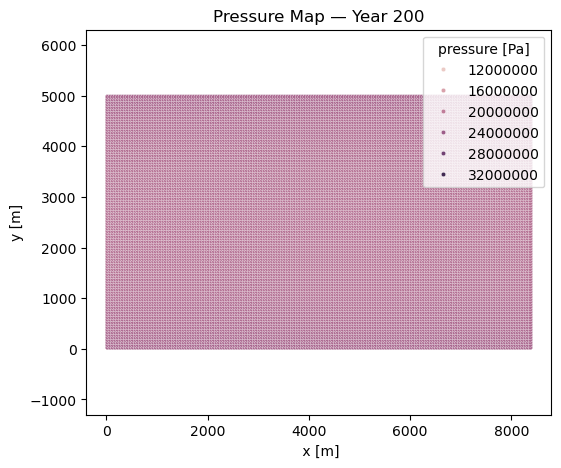

In [12]:
years_to_plot = [0, 50, 100, 150, 200]

for y in years_to_plot:
    subset = spatial_all[spatial_all["year"] == y]
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=subset, x=" x [m]", y="y [m]", hue="pressure [Pa]", s=10)
    plt.title(f"Pressure Map — Year {y}")
    plt.axis("equal")
    plt.show()

In [ ]:
# Save Intermediate Exploration Results
interim = Path(r"C:\Users\tetec\Documents\Data Project Coding\.vscode\Project data\spe11c\data\interim\cleaned")

interim.mkdir(parents=True, exist_ok=True)

# Save DataFrames as Parquet files
spatial_all.to_parquet(interim / "spatial_all.parquet")
timeseries.to_parquet(interim / "timeseries.parquet")